In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
def file_name(file_dir): 
    dic={}
    for root, dirs, files in os.walk(file_dir):
        dic[root]=files
#         print(root) #path
#         print(dirs) #subdirectory
#         print(files) #files in non-subdirectory
    return dic

In [ ]:
AutomaticExtractionData=file_name("./AutomaticExtractionData_IMUZCenter")
ManualExtractionData=file_name("./ManualExtractionData")
ManualExtractionData_name=list(ManualExtractionData.keys())[1:]
label=pd.read_csv('./IDGenderAgelist_ig.csv',dtype='object')

In [ ]:
def change_ID_number(x):
    if len(x)==3:
        return ('000' + x)
    elif len(x)==4:
        return ('00' + x)
    elif len(x)==5:
        return ('0' + x)
    else:
        return x
      
label['adjusted_ID']=label['ID'].apply(lambda x: change_ID_number(x))
def file_name_with_ID(x,post,ls):
    for i in range(len(list(ls))):
        if (x == ls[i][5:11] and ls[i][12:]== post):
            return(ls[i])

In [ ]:
label['AutomaticExtractionData_IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq0.csv',list(AutomaticExtractionData.values())[0]))
label['AutomaticExtractionData_IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq1.csv',list(AutomaticExtractionData.values())[0]))
label['ManualExtractionData/IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZRight_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZLeft_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/Android_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[3]]))

In [ ]:
def generate_read_table(fileName,actionName,ID,label): 
  #try:
    dataset_name= fileName + actionName
    path_name= fileName +'/'+ str(label[label['ID']==ID][dataset_name].values[0])
    if fileName=='ManualExtractionData/Android':
      df=pd.read_csv(path_name,skiprows=2)
      df.columns=[0,0,0,df.columns.values[3],df.columns.values[4],df.columns.values[5]]
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    else:
      df=pd.read_csv(path + path_name,skiprows=2)
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
    df = df.astype(float)
    return df
  #except:
    #return None
df = generate_read_table(path_name, 'AutomaticExtractionData_IMUZCenter','_Walk_1','002318',label)

In [ ]:
df.head()

In [ ]:
import random
import math

def make_windowed(raw_data, target_class ,window_size, num_gen):

    ls_data, ls_target = [], []

    for i in range(0,num_gen):
      start_index = random.randrange(len(raw_data) - (window_size))
      ls_data.append(raw_data[i:i + window_size])
      ls_target.append(target_class)

    return ls_data, ls_target

def yipeng_preprocessing(raw_data, length):
            
  # Data augmentation
  if raw_data.shape[0] > length:
    data = raw_data[0:length] # Cut the data
  else:
    period = math.ceil(length / raw_data.shape[0])
    temp = np.copy(raw_data)
    # copy the data periodic
    for i in range(period-1):
      temp = np.row_stack((temp, raw_data))
      data = (temp[0:length]) # Cut the data
            
  return data

In [ ]:
import copy

df = pd.read_csv('./IDGenderAgelist_ig.csv')
ids = df["ID"].values
gender = df["Gender(0:Female;1:Male)"].values
age = copy.deepcopy(df["Age"].values)
act_age = df["Age"].values

In [ ]:
from keras.utils.np_utils import to_categorical
for i in range(0,16):
    age[(age > (i * 5)) & (age <= ((i + 1) * 5))] = i

In [ ]:
plt.hist(age,bins = 16)
#i = 1
#df[(df["Age"] > (i * 10)) & (df["Age"] <= ((i + 1) * 10))]["Age"]

In [ ]:
#y = df["Age"].values
to_categorical(age).shape

In [ ]:
sorted(age)

In [ ]:
df.head()

In [1]:
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, Bidirectional, Dropout, Flatten, Dense, TimeDistributed, GlobalMaxPooling1D, Conv2D, Reshape, Activation, Add, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D
from keras.losses import categorical_crossentropy, binary_crossentropy
from keras.layers.merge import concatenate


def get_model(n_timesteps,n_features):
  inputs = Input(shape=(n_timesteps,n_features,))
  x = Conv1D(256, 11, padding='same', activation='relu')(inputs)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(256, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(128, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv1D(64, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Bidirectional(LSTM(100,return_sequences=True))(x)
  x = Bidirectional(LSTM(100))(x)
  x = Dropout(0.5)(x)
  
  x_gender = Dense(100, activation='relu')(x)
  gender = Dense(1, activation='sigmoid',name='gender')(x_gender)
  
  x_age = Dense(100, activation='relu')(x)
  age = Dense(16, activation='softmax',name='age')(x_age)
  
  x_data = Dense(100, activation='relu')(x)
  data = Dense(18, activation='softmax',name='dataset')(x_data)
  
    
  outputs = [gender, age, data]
  
  model = Model(inputs=inputs, outputs = outputs)
  
  model.compile(loss={'gender': binary_crossentropy, 'age': categorical_crossentropy, "dataset": categorical_crossentropy},
                  loss_weights={'gender': 0.40, 'age': 0.50, "dataset": 0.10},
                optimizer='adam', metrics=['accuracy'])
  return model 

/home/takuya/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


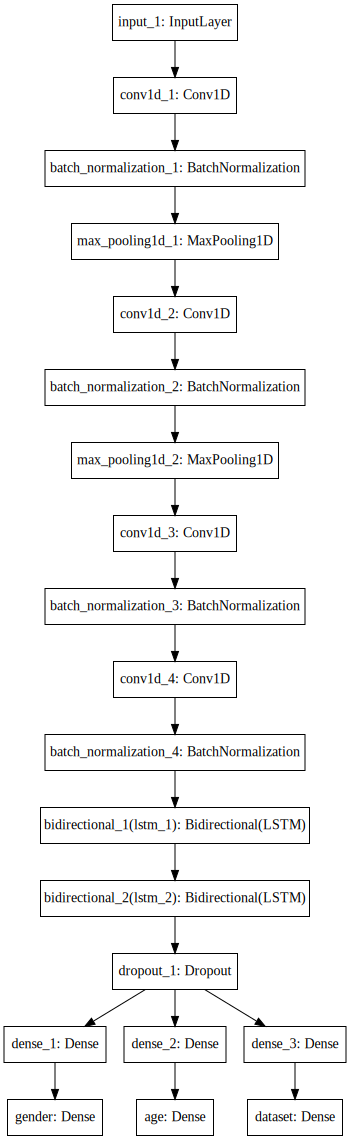

In [2]:
from keras.utils.vis_utils import model_to_dot 
from IPython.display import SVG

model = get_model(1000,6)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
def calc_min(x_train):
  ls_min_len = []
  min_len = 1000
  for j in range(0,len(x_train)):
    if(min_len > len(x_train[j])):
      min_len = len(x_train[j])
      index = j
  return min_len

def get_max(y_pred):
    for i in range(len(y_pred)):
        temp = y_pred[i]
        temp[np.argmax(temp)] = 1
        temp[temp != 1] = 0
        y_pred[i] = temp
    return y_pred

In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.backend import tensorflow_backend as backend
from sklearn.preprocessing import StandardScaler

ls_acc = []
ls_mae = []
length = 1000

datasets = label.columns[4:]
file_name=['AutomaticExtractionData_IMUZCenter','ManualExtractionData/IMUZCenter','ManualExtractionData/IMUZRight',
          'ManualExtractionData/IMUZLeft','ManualExtractionData/Android']
action_name=['_Walk_1','_Walk_2','_SlopeDown','_SlopeUp']
skf = StratifiedKFold(n_splits = 5)

for train_index, test_index in skf.split(ids, gender):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    ids_train, ids_test = ids[train_index], ids[test_index]
    gender_train, gender_test = gender[train_index], gender[test_index]
    age_dummy = to_categorical(age)
    age_train, age_test = age_dummy[train_index], age_dummy[test_index]
    _, act_age_test = act_age[train_index], act_age[test_index]
    ids_train, ids_valid, gender_train, gender_valid, age_train, age_valid  = train_test_split(ids_train, gender_train, age_train,  test_size=0.10, random_state=42)
    
    x_train = []
    new_y_train = []
    new_gender_train = []
    new_age_train = []
    dataset_train = []
    for i in tqdm(range(0,len(ids_train))):
        subject_id = change_ID_number(str(ids_train[i]))
        c = 0
        for k in range(0,len(file_name)):
            for l in range(0,len(action_name)):
                try:
                    df_subject = generate_read_table(file_name[k], action_name[l],subject_id,label)
                    sc = StandardScaler()
                    df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                    
                    temp_x = yipeng_preprocessing(df_subject.values, length)
                    x_train.append(temp_x)
                    new_gender_train.append(gender_train[i])
                    new_age_train.append(age_train[i])
                    dataset_train.append(c)
                except: 
                    continue
                c += 1
    x_valid = []
    new_gender_valid = []
    new_age_valid = []
    dataset_valid = []
    
    for i in tqdm(range(0,len(ids_valid))):
        subject_id = change_ID_number(str(ids_valid[i]))
        c = 0
        for k in range(0,len(file_name)):
            for l in range(0,len(action_name)):
                try:
                    df_subject = generate_read_table(file_name[k], action_name[l],subject_id,label)
                    sc = StandardScaler()
                    df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                    
                    temp_x = yipeng_preprocessing(df_subject.values, length)
                    x_valid.append(temp_x)
                    new_gender_valid.append(gender_valid[i])
                    new_age_valid.append(age_valid[i])
                    dataset_valid.append(c)
                except:
                    continue
                c += 1
                
    x_test = []
    new_gender_test = []
    new_age_test= []
    new_act_age_test = []
    for i in tqdm(range(0,len(ids_test))):
        subject_id = change_ID_number(str(ids_test[i]))
        for k in range(0,len(file_name)):
            for l in range(0,len(action_name)):
                try:
                    df_subject = generate_read_table(file_name[k], action_name[l],subject_id,label)
                    sc = StandardScaler()
                    df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                    
                    temp_x = yipeng_preprocessing(df_subject.values, length)
                    x_test.append(temp_x)
                    new_gender_test.append(gender_test[i])
                    new_age_test.append(age_test[i])
                    new_act_age_test.append(act_age_test[i])
                except:
                    continue
    print("Train size: " + str(len(x_train)))
    print("Valid size: " + str(len(x_valid)))
    print("Test size: " + str(len(x_test)))
    
    x_train = np.array(x_train)
    x_valid = np.array(x_valid)
    x_test = np.array(x_test)
    gender_train = np.array(new_gender_train)
    gender_valid = np.array(new_gender_valid)
    gender_test = np.array(new_gender_test)
    age_train = np.array(new_age_train)
    age_valid = np.array(new_age_valid)
    age_test = np.array(new_age_test)
    act_age_test = np.array(new_act_age_test)
    
    dataset_train = to_categorical(dataset_train)
    dataset_valid = to_categorical(dataset_valid)
        
    model = get_model(x_train.shape[1],x_train.shape[2])
    result = model.fit(x_train, [gender_train, age_train, dataset_train], validation_data = (x_valid,[gender_valid, age_valid, dataset_valid]),epochs= 10, batch_size = 256)
    y_pred = model.predict(x_test)
    
    gender_pred = y_pred[0]
    gender_pred[gender_pred < 0.5] = 0
    gender_pred[gender_pred >= 0.5] = 1
    print(accuracy_score(gender_pred,gender_test))
    ls_acc.append(accuracy_score(gender_pred,gender_test))

    age_pred = y_pred[1]
    age_pred = get_max(age_pred)
    print(accuracy_score(age_pred,age_test))
    
    _, age_pred_index = np.where(age_pred == 1)
    mean_age = age_pred_index * 5 + 2.5
    print(np.mean(abs(act_age_test - mean_age)))
    ls_mae.append(np.mean(abs(act_age_test - mean_age)))
    backend.clear_session()

In [ ]:
print(ls_mae)

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(ls_acc)
plt.savefig("result_gender")

In [ ]:
plt.boxplot(ls_mae)
plt.savefig("result_age")